In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
import missingno as msno
% matplotlib inline

sns.set()


In [12]:
players = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\RedCard\data\\raw_players.csv.gz",
    compression="gzip", index_col=[0]
)
print(players.shape)
players[:5]


(2053, 7)


,birthday,height,weight,position,photoID,rater1,rater2
playerShort,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


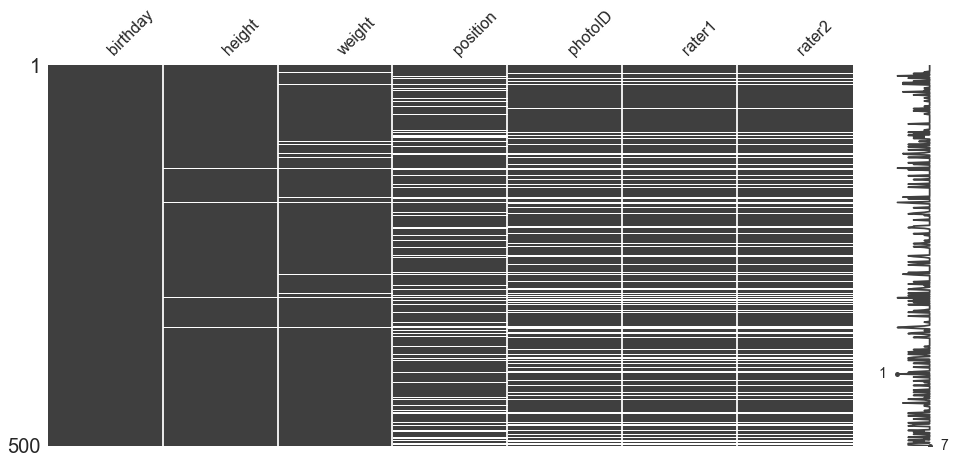

In [13]:
# 查看空值
msno.matrix(players.sample(500), figsize=(16, 7), width_ratios=(15, 1))

# 全黑的表示没有空值，白色的地方就表示空值


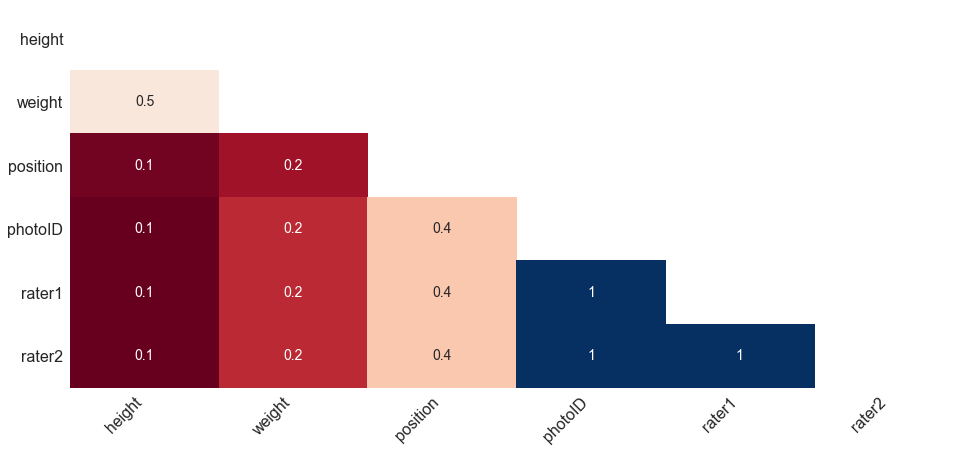

In [15]:
# 查看空值的关联性
msno.heatmap(players.sample(500), figsize=(16, 7))

# ranges from 
# -1 (if one variable appears the other definitely does not) to 
# 0 (variables appearing or not appearing have no effect on one another) to 
# 1 (if one variable appears the other definitely also does).

# A和B的值越接近1表示，A出现，B越有可能出现


In [20]:
# 查看空值的个数
print("All players:", len(players))
print("rater1 nulls:", len(players[players["rater1"].isnull()]))
print("rater2 nulls:", len(players[players["rater2"].isnull()]))
print("Both nulls:", len(players[players["rater1"].isnull() & players["rater2"].isnull()]))

# 验证了上面热度图里面rater1和rater2的关系


All players: 2053
rater1 nulls: 468
rater2 nulls: 468
Both nulls: 468


In [21]:
# 删除rater1为空的行
players = players[players["rater1"].notnull()]
players.shape


(1585, 7)

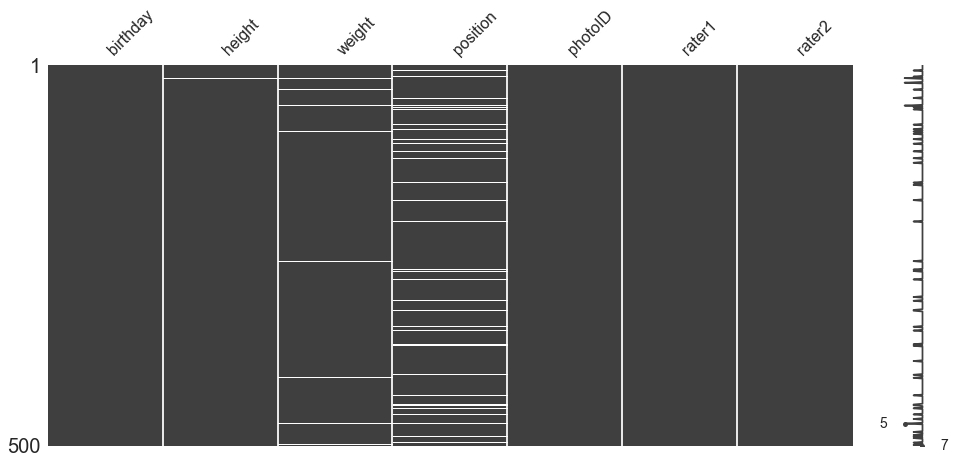

In [22]:
# msno查看空值情况
msno.matrix(players.sample(500), figsize=(16, 7), width_ratios=(15, 1))


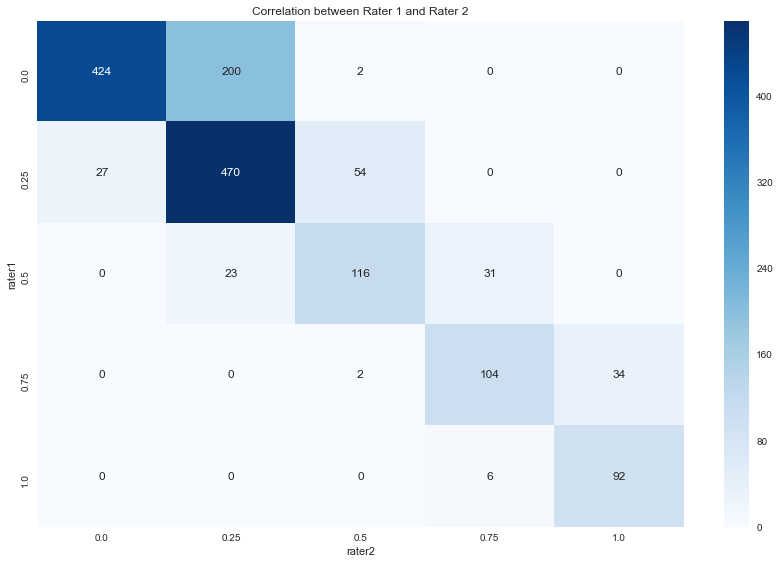

In [24]:
# crosstab
pd.crosstab(players.rater1, players.rater2)

# 两个数据组合
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(players["rater1"], players["rater2"]), cmap="Blues", annot=True, fmt="d", ax=ax)
ax.set_title("Correlation between Rater 1 and Rater 2")
fig.tight_layout()


In [25]:
# skintone
players["skintone"] = players[["rater1", "rater2"]].mean(axis=1)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250


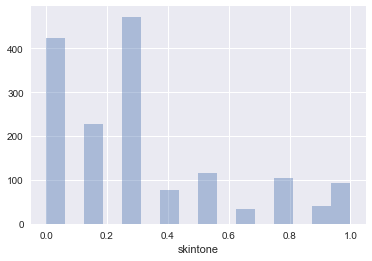

In [26]:
sns.distplot(players["skintone"], kde=False)


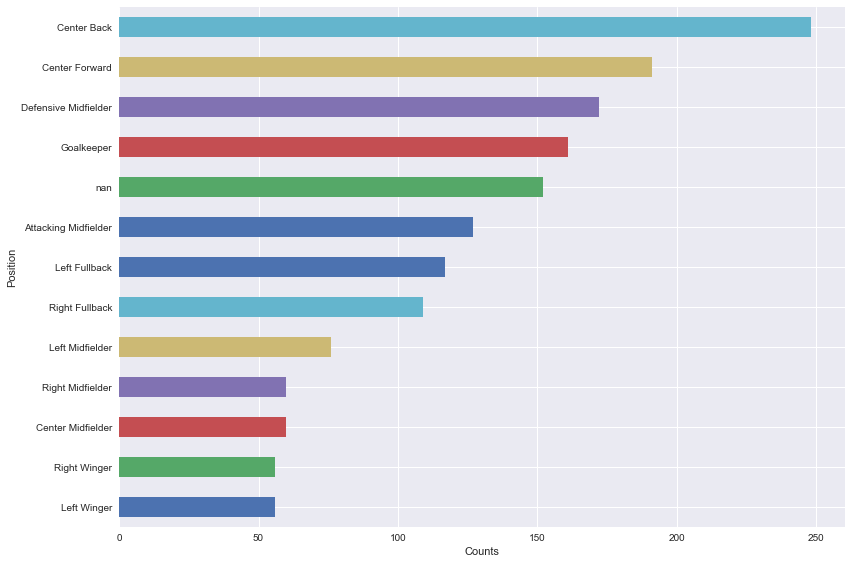

In [29]:
# position
fig, ax = plt.subplots(figsize=(12, 8))
players["position"].value_counts(dropna=False, ascending=True).plot(kind="barh", ax=ax)
ax.set_ylabel("Position")
ax.set_xlabel("Counts")
fig.tight_layout()


In [35]:
# 合并球员位置
position_types = players["position"].unique()
print(position_types)

# 合并到4个位置
defense = ['Center Back', 'Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder', ]
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
keeper = 'Goalkeeper'

players.loc[players["position"].isin(defense), "position_agg"] = "Defense"
players.loc[players['position'].isin(midfield), 'position_agg'] = "Midfield"
players.loc[players['position'].isin(forward), 'position_agg'] = "Forward"
players.loc[players['position'].eq(keeper), 'position_agg'] = "Keeper"
players[:5]


['Center Back' 'Attacking Midfielder' 'Right Midfielder'
 'Center Midfielder' 'Goalkeeper' 'Defensive Midfielder' 'Left Fullback'
 nan 'Left Midfielder' 'Right Fullback' 'Center Forward' 'Left Winger'
 'Right Winger']


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg
playerShort,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense


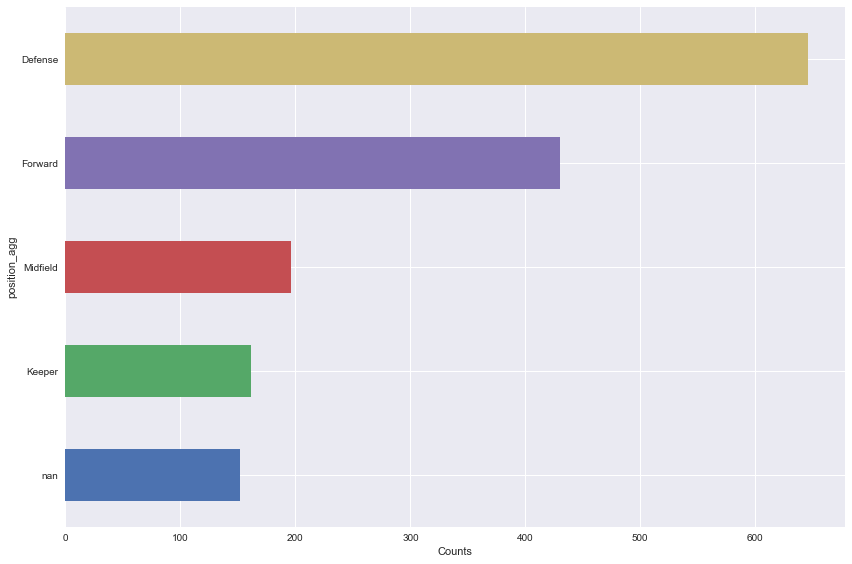

In [36]:
# 查看position_agg值的分布情况
fig, ax = plt.subplots(figsize=(12, 8))
players["position_agg"].value_counts(dropna=False, ascending=True).plot(kind="barh", ax=ax)
ax.set_ylabel("position_agg")
ax.set_xlabel("Counts")
fig.tight_layout()


D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """
D:\Coding\Anaconda3\envs\idata\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B97E1AA668>,
      dtype=object)

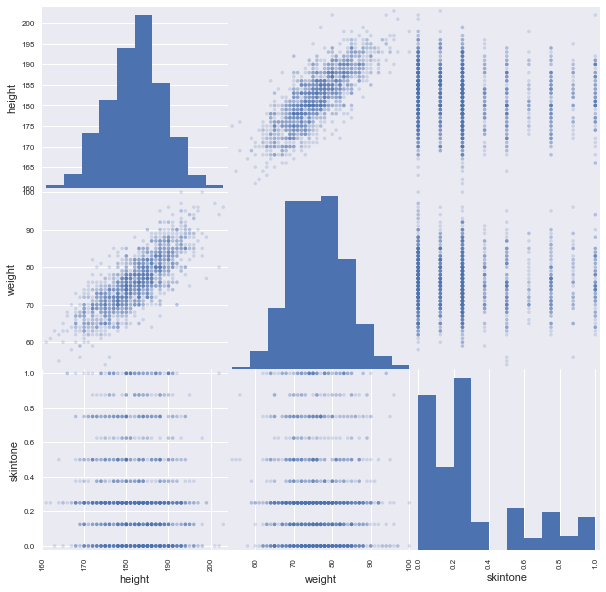

In [41]:
# 查看height,weight,skintone的相关性
from pandas.tools.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(players[["height", "weight", "skintone"]], alpha=0.2, diagonal="hist", ax=ax)

# 可以看出身高和体重是有关系的，但是肤色和身高与体重之间是没有关系的


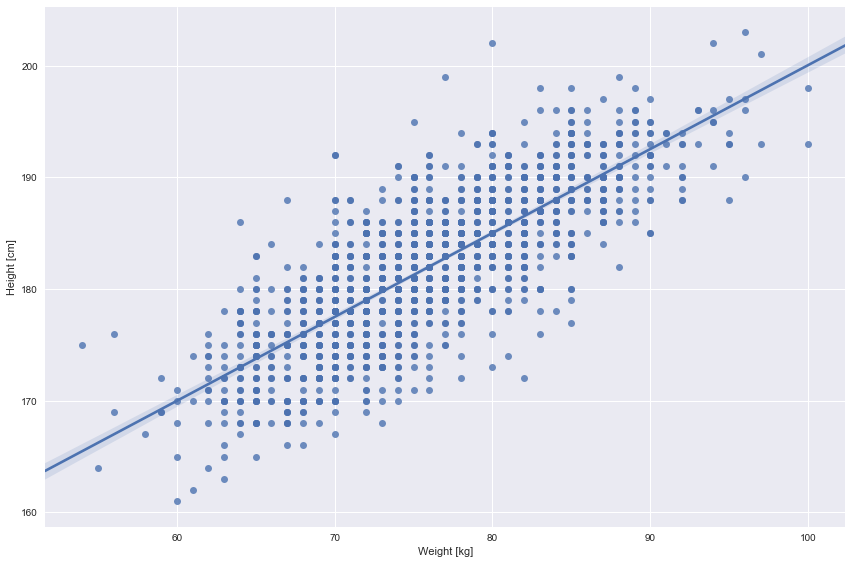

In [42]:
# 查看height和weight之间的关系
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot("weight", "height", data=players, ax=ax)
ax.set_ylabel("Height [cm]")
ax.set_xlabel("Weight [kg]")
fig.tight_layout()


In [44]:
# 使用qcut，把weight从连续值改为区间值
weight_categories = ["vlow_weight",
                     "low_weight",
                     "mid_weight",
                     "high_weight",
                     "vhigh_weight",
                     ]
# qcut
players["weightclass"] = pd.qcut(players["weight"], len(weight_categories), weight_categories)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass
playerShort,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight


In [45]:
# 使用qcut，修改height

height_categories = ["vlow_height",
                     "low_height",
                     "mid_height",
                     "high_height",
                     "vhigh_height",
                     ]

players['heightclass'] = pd.qcut(players['height'],
                                 len(height_categories),
                                 height_categories)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass,heightclass
playerShort,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight,mid_height
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight,mid_height
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight,vlow_height
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight,low_height
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight,low_height


In [46]:
# qcut skintone

pd.qcut(players['skintone'], 3)


playerShort
aaron-hughes              (-0.001, 0.125]
aaron-hunt                (-0.001, 0.125]
aaron-lennon                (0.125, 0.25]
aaron-ramsey              (-0.001, 0.125]
abdelhamid-el-kaoutari      (0.125, 0.25]
abdou-traore_2                (0.25, 1.0]
abdoulaye-diallo_2            (0.25, 1.0]
abdoulaye-keita_2             (0.25, 1.0]
abdoulwhaid-sissoko           (0.25, 1.0]
abdul-rahman-baba             (0.25, 1.0]
abdul-razak                   (0.25, 1.0]
abel-aguilar                  (0.25, 1.0]
abelaziz-barrada          (-0.001, 0.125]
abou-diaby                    (0.25, 1.0]
adam-bodzek                 (0.125, 0.25]
adam-campbell             (-0.001, 0.125]
adam-federici             (-0.001, 0.125]
adam-hlousek              (-0.001, 0.125]
adam-johnson              (-0.001, 0.125]
adam-morgan                 (0.125, 0.25]
adam-pinter               (-0.001, 0.125]
adam-smith_3              (-0.001, 0.125]
adam-szalai                 (0.125, 0.25]
adan                  

In [47]:
# qcut skintone，直接使用默认的名字
players['skintoneclass'] = pd.qcut(players['skintone'], 3)
players[:5]


,birthday,height,weight,position,photoID,rater1,rater2,skintone,position_agg,weightclass,heightclass,skintoneclass
playerShort,,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125,Defense,low_weight,mid_height,"(-0.001, 0.125]"
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125,Forward,low_weight,mid_height,"(-0.001, 0.125]"
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250,Midfield,vlow_weight,vlow_height,"(0.125, 0.25]"
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000,Midfield,mid_weight,low_height,"(-0.001, 0.125]"
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250,Defense,low_weight,low_height,"(0.125, 0.25]"
